In [1]:
#import libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set_style("darkgrid")

In [2]:
#import data
headers = ['time_utc', 'id', 'wind_speed_ms', 'rpm', 'wind_direction_degrees', 'temperature', 'control_state_stopped', 'control_state_running', 'control_state_stopping', 'control_state_foreign_stop', 'control_state_starting', 'active_power_kw']

parse_dates = ['time_utc']
df = pd.read_csv("../AssetsData/formatted_data_new.csv", sep=',', names=headers, parse_dates=parse_dates, skiprows=1)
df.head()


time_utc  id  wind_speed_ms       rpm  \
0  2021-10-29 23:09:01.357  67       1.307010  0.920394   
34 2021-10-29 23:09:00.000  79      -0.529740  0.582259   
35 2021-10-29 23:09:00.000  93      -0.667496  0.529189   
36 2021-10-29 23:09:00.000   4       0.204960  0.620167   
37 2021-10-29 23:09:00.000  95       0.664147  0.757392   

    wind_direction_degrees  temperature  control_state_stopped  \
0                -0.207912     1.841676                      0   
34                0.190809     0.489036                      0   
35                0.087156     0.489036                      0   
36                0.390731     1.165356                      0   
37                0.087156     0.489036                      0   

    control_state_running  control_state_stopping  control_state_foreign_stop  \
0                       1                       0                           0   
34                      1                       0                           0   
35                      1                       0                           0   
36                      1                       0                           0   
37                      1                       0                           0   

    control_state_starting  active_power_kw  
0                        0          1055600  
34                       0          1043100  
35                       0          1082900  
36                       0          1409300  
37                       0          2348500

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 556668 entries, 0 to 1048547
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   time_utc                    556668 non-null  datetime64[ns]
 1   id                          556668 non-null  int64         
 2   wind_speed_ms               556668 non-null  float64       
 3   rpm                         556668 non-null  float64       
 4   wind_direction_degrees      556668 non-null  float64       
 5   temperature                 556668 non-null  float64       
 6   control_state_stopped       556668 non-null  int64         
 7   control_state_running       556668 non-null  int64         
 8   control_state_stopping      556668 non-null  int64         
 9   control_state_foreign_stop  556668 non-null  int64         
 10  control_state_starting      556668 non-null  int64         
 11  active_power_kw             556668 non-null

<h2>Single Linear Regression</h2>
Getting the Yhat, intercept and the coeficient

In [4]:
from sklearn.linear_model import LinearRegression

lm=LinearRegression()

X = df[['wind_speed_ms']]
Y = df['active_power_kw']

lm.fit(X, Y)
inter = lm.intercept_ #b0
coef = lm.coef_ #b1 aka slope

SLR_Yhat = lm.predict(X)

print(inter, coef, SLR_Yhat)

1176139.8607828706 [822459.90636293] [2251103.01850631  740449.78549419  627150.91638727 ...  325020.26978484
  325020.26978484  -90409.32817049]


<h2>Multiple Linear Regression</h2>

In [5]:
x = df[["wind_speed_ms", "wind_direction_degrees", "temperature"]]

lm.fit(x, df['active_power_kw'])

inters = lm.intercept_ #b0
coefs = lm.coef_ #b1,b2, etc. You get an array([,,,,])

MLR_Yhat = lm.predict(x)

print(inters, coefs, MLR_Yhat)

1161058.8373991835 [823763.93171384  83237.25022742 -18779.81687696] [2185834.02156357  731376.37073316  609270.06182855 ...  336392.4871066
  333508.75870896  -64903.81627254]


<h2>Residual Plots</h2>
for SLR

C:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='wind_speed_ms', ylabel='active_power_kw'>

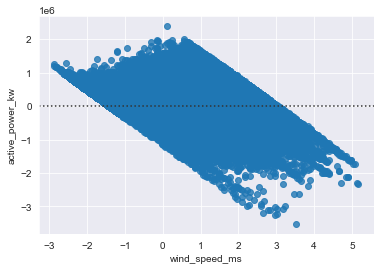

In [6]:
sns.residplot(df["wind_speed_ms"], df[["active_power_kw"]])

We can see that the values are not spread around the min and max value the same way, this means that linear regression is not a perfect fit

<h2>Distribution plot</h2>
for MLR

C:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\marti\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'MLR')]

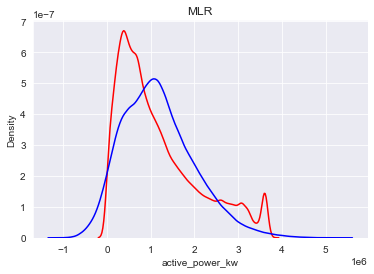

In [7]:
ax1 = sns.distplot(df['active_power_kw'], hist = False, color = 'r', label='Actual Value')

sns.distplot(MLR_Yhat, hist=False, color = 'b', label = 'Fitted Values', ax = ax1).set(title='MLR')

it doesnt fit

In [8]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


x = df[['wind_speed_ms', 'wind_direction_degrees', 'temperature']]
y = df[['active_power_kw']]

Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures(degree=4)),('model', LinearRegression())]
#make a pipeline object by inserting the list in the pipeline constructor
pipe = Pipeline(Input)

pipe.fit(x, y)

Yhat = pipe.predict(x)

[Text(0.5, 1.0, 'Without Cross validation')]

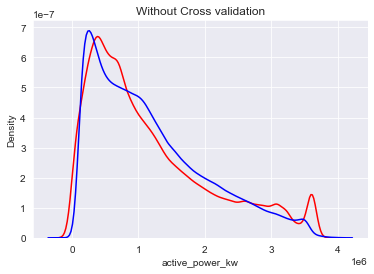

In [9]:
ax2 = sns.kdeplot(df['active_power_kw'], color = 'r')
sns.kdeplot(Yhat.squeeze(), color = 'b', ax = ax2).set(title='Without Cross validation')

In [10]:
from sklearn.metrics import mean_squared_error

print("Mean squared error: ", mean_squared_error(df['active_power_kw'],Yhat))
print("R squared: ", pipe.score(x,y))

Mean squared error:  145800769462.41544
R squared:  0.8300195521973189


In [11]:
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.45, random_state=0)
pipe2 = Pipeline(Input)
pipe2.fit(x_train, y_train)
Yhat2 = cross_val_predict(pipe2, x_test, y_test, cv=3)

scores = cross_val_score(pipe2, x_train, y_train, cv=3)
print(scores)
print(np.mean(scores))


[0.82778471 0.82755704 0.83039556]
0.8285791061283408


[Text(0.5, 1.0, 'Cross validation')]

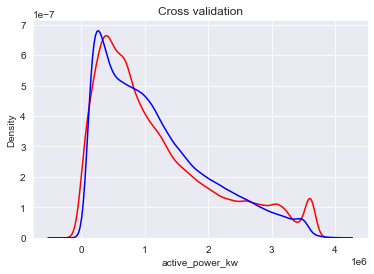

In [12]:
ax1 = sns.kdeplot(y_test['active_power_kw'], color = 'r')
sns.kdeplot(Yhat2.squeeze() , color = 'b', ax = ax1).set(title='Cross validation')

In [13]:
#print("Mean squared error: ", mean_squared_error(y_test['active_power_kw'],Yhat2))
#print("R squared: ", pipe2.score(x_test,y_test))

In [14]:
'''lr = LinearRegression()
#lr.fit(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_train)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Rsqu_test = []
order = list(range(1,16))
for n in order:
    pr=PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])
    x_test_pr = pr.fit_transform(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu_test)'''

"lr = LinearRegression()\n#lr.fit(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_train)\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)\n\nRsqu_test = []\norder = list(range(1,16))\nfor n in order:\n    pr=PolynomialFeatures(degree = n)\n    x_train_pr = pr.fit_transform(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])\n    x_test_pr = pr.fit_transform(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])\n    lr.fit(x_train_pr, y_train)\n    Rsqu_test.append(lr.score(x_test_pr, y_test))\n\nplt.plot(order, Rsqu_test)\nplt.xlabel('order')\nplt.ylabel('R^2')\nplt.title('R^2 Using Test Data')\n#plt.text(3, 0.75, 'Maximum R^2 ')\nprint(Rsqu_test)"

In [15]:
'''import time
lr = LinearRegression()
#lr.fit(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_train)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

Rsqu_test = []
order = list(range(1,16))
for n in order:
    time1 = time.time()
    pr=PolynomialFeatures(degree = n)
    x_train_pr = pr.fit_transform(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])
    x_test_pr = pr.fit_transform(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])
    lr.fit(x_train_pr, y_train)
    time2 = time.time()
    Rsqu_test.append(lr.score(x_test_pr, y_test) / (time2-time1))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2 / Time')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu_test)'''

"import time\nlr = LinearRegression()\n#lr.fit(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_train)\nx_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)\n\nRsqu_test = []\norder = list(range(1,16))\nfor n in order:\n    time1 = time.time()\n    pr=PolynomialFeatures(degree = n)\n    x_train_pr = pr.fit_transform(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])\n    x_test_pr = pr.fit_transform(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])\n    lr.fit(x_train_pr, y_train)\n    time2 = time.time()\n    Rsqu_test.append(lr.score(x_test_pr, y_test) / (time2-time1))\n\nplt.plot(order, Rsqu_test)\nplt.xlabel('order')\nplt.ylabel('R^2 / Time')\nplt.title('R^2 Using Test Data')\n#plt.text(3, 0.75, 'Maximum R^2 ')\nprint(Rsqu_test)"

In [16]:
'''lr = LinearRegression()
#lr.fit(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_train)

Rsqu_test = []

test_sizes = list([x / 100 for x in range(20, 80, 5)])
for n in test_sizes:
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=n, random_state=0)

    pr=PolynomialFeatures(degree = 4)
    x_train_pr = pr.fit_transform(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])
    x_test_pr = pr.fit_transform(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])
    lr.fit(x_train_pr, y_train)
    Rsqu_test.append(lr.score(x_test_pr, y_test))
'''

"lr = LinearRegression()\n#lr.fit(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_train)\n\nRsqu_test = []\n\ntest_sizes = list([x / 100 for x in range(20, 80, 5)])\nfor n in test_sizes:\n    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=n, random_state=0)\n\n    pr=PolynomialFeatures(degree = 4)\n    x_train_pr = pr.fit_transform(x_train[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])\n    x_test_pr = pr.fit_transform(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']])\n    lr.fit(x_train_pr, y_train)\n    Rsqu_test.append(lr.score(x_test_pr, y_test))\n"

In [17]:
'''plt.plot(test_sizes, Rsqu_test)
plt.xlabel('Test Size')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
#plt.text(3, 0.75, 'Maximum R^2 ')
print(Rsqu_test)'''

"plt.plot(test_sizes, Rsqu_test)\nplt.xlabel('Test Size')\nplt.ylabel('R^2')\nplt.title('R^2 Using Test Data')\n#plt.text(3, 0.75, 'Maximum R^2 ')\nprint(Rsqu_test)"

In [18]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
parameters1 = [{'alpha':[0.001,0.1, 1,10,100,1000,10000,100000,1000000]}]
RR = Ridge()
Grid1 = GridSearchCV(RR, parameters1,cv=4)
Grid1.fit(x,y)
print(Grid1.best_score_)
print(Grid1.best_estimator_) #finds the best values for the free parameters
print(Grid1.cv_results_['mean_test_score']) #gets the mean score of the valuidation data
RR.get_params(deep=True)
BestRR.score(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_test)

0.6823768545477229
Ridge(alpha=10000)
[ 0.6816744   0.68167442  0.68167461  0.68167647  0.68169491  0.68186616
  0.68237685  0.62607137 -0.00185824]


NameError: name 'BestRR' is not defined

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 1000000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x, y)
BestRR=Grid1.best_estimator_
print(BestRR)
BestRR.score(x_test[['wind_speed_ms', 'wind_direction_degrees', 'temperature']], y_test)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
RR=Ridge()
Grid1 = GridSearchCV(RR, parameters1, cv=4)
Grid1.fit(x_train, y_train)
BestRR=Grid1.best_estimator_
BestRR.score(x_test, y_test)

In [ ]:
plt.figure(figsize=(width, height))
plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()